In [17]:
import svm
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [19]:
num_samples=50
num_features=2
grid_size=100
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                    .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

In [20]:
clf = svm.SVM(C = 0.1)

In [13]:
alphas , bias = clf.train(samples, labels) 

     pcost       dcost       gap    pres   dres
 0: -7.5157e+00 -7.4707e+00  2e+02  1e+01  6e-16
 1: -1.5413e+00 -7.0496e+00  1e+01  5e-01  6e-16
 2: -1.3172e+00 -3.0487e+00  2e+00  1e-16  6e-16
 3: -1.6371e+00 -1.8709e+00  2e-01  9e-17  5e-16
 4: -1.7390e+00 -1.7950e+00  6e-02  1e-16  4e-16
 5: -1.7597e+00 -1.7718e+00  1e-02  1e-16  3e-16
 6: -1.7657e+00 -1.7665e+00  8e-04  1e-16  3e-16
 7: -1.7661e+00 -1.7661e+00  8e-06  1e-16  5e-16
 8: -1.7661e+00 -1.7661e+00  8e-08  1e-16  4e-16
Optimal solution found.


In [14]:
def plot(predictor, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
        
    
    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [15]:
predictor = clf

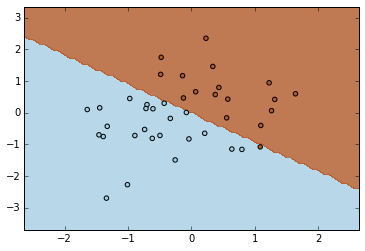

In [16]:
plot(predictor, samples, labels, grid_size)